In [3]:
!pip install --upgrade tensorflow
!pip install --upgrade keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 101.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 77.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 96.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 71.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 36.3 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    F

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google_drive_downloader import GoogleDriveDownloader as gdd
from sklearn.model_selection import train_test_split
import keras
import os
import shutil
import imghdr

In [ ]:
print(os.listdir())

['.config', 'drive', 'sample_data']


In [ ]:
def detectar_corrupcion(directory):
    images_corruptas = []
    images_no_corruptas = []
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        if os.path.isfile(file_path):
            try:
                # Verificar el tipo de archivo de la imagen
                image_type = imghdr.what(file_path)
                if image_type and (image_type.lower() == "jpg" or image_type.lower() == "jpeg"):
                    # Intentar abrir la imagen
                    with Image.open(file_path) as img:
                        # Verificar si la imagen se puede cargar correctamente
                        img.load()
                        # Verificar el formato de compresión
                        if img.format == "JPEG":
                            images_no_corruptas.append(filename)
                else:
                    images_corruptas.append(filename)
            except Exception as e:
                images_corruptas.append(file_path)
    for corrupt_file in images_corruptas:
      corrupt_file_path = os.path.join(directory, corrupt_file)
      os.remove(corrupt_file_path)
      print(f"El archivo corrupto {corrupt_file} ha sido eliminado.")
    return images_corruptas

In [ ]:
routes_list = [r"/content/drive/MyDrive/Tomates_proyecto/optimizado/train/Bacterial_spot",
               r"/content/drive/MyDrive/Tomates_proyecto/optimizado/train/Early_blight",
               r"/content/drive/MyDrive/Tomates_proyecto/optimizado/train/Late_blight",
               r"/content/drive/MyDrive/Tomates_proyecto/optimizado/train/Leaf_Mold",
               r"/content/drive/MyDrive/Tomates_proyecto/optimizado/train/Septoria_leaf_spot",
               r"/content/drive/MyDrive/Tomates_proyecto/optimizado/train/Spider_mites Two-spotted_spider_mite",
               r"/content/drive/MyDrive/Tomates_proyecto/optimizado/train/Target_Spot",
               r"/content/drive/MyDrive/Tomates_proyecto/optimizado/train/Tomato_Yellow_Leaf_Curl_Virus",
               r"/content/drive/MyDrive/Tomates_proyecto/optimizado/train/Tomato_mosaic_virus",
               r"/content/drive/MyDrive/Tomates_proyecto/optimizado/train/healthy",
               r"/content/drive/MyDrive/Tomates_proyecto/optimizado/train/powdery_mildew",
               r"/content/drive/MyDrive/Tomates_proyecto/optimizado/valid/Bacterial_spot",
               r"/content/drive/MyDrive/Tomates_proyecto/optimizado/valid/Early_blight",
               r"/content/drive/MyDrive/Tomates_proyecto/optimizado/valid/Late_blight",
               r"/content/drive/MyDrive/Tomates_proyecto/optimizado/valid/Leaf_Mold",
               r"/content/drive/MyDrive/Tomates_proyecto/optimizado/valid/Septoria_leaf_spot",
               r"/content/drive/MyDrive/Tomates_proyecto/optimizado/valid/Spider_mites Two-spotted_spider_mite",
               r"/content/drive/MyDrive/Tomates_proyecto/optimizado/valid/Target_Spot",
               r"/content/drive/MyDrive/Tomates_proyecto/optimizado/valid/Tomato_Yellow_Leaf_Curl_Virus",
               r"/content/drive/MyDrive/Tomates_proyecto/optimizado/valid/Tomato_mosaic_virus",
               r"/content/drive/MyDrive/Tomates_proyecto/optimizado/valid/healthy",
               r"/content/drive/MyDrive/Tomates_proyecto/optimizado/valid/powdery_mildew"]

In [ ]:
def detectar_corrupcion(directory):
    images_corruptas = []
    images_no_corruptas = []
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        if os.path.isfile(file_path):
            try:
                # Verificar el tipo de archivo de la imagen
                image_type = imghdr.what(file_path)
                if image_type and (image_type.lower() == "jpg" or image_type.lower() == "jpeg"):
                    # Intentar abrir la imagen
                    with Image.open(file_path) as img:
                        # Verificar si la imagen se puede cargar correctamente
                        img.load()
                        # Verificar el formato de compresión
                        if img.format == "JPEG":
                            images_no_corruptas.append(filename)
                else:
                    images_corruptas.append(filename)
            except Exception as e:
                images_corruptas.append(file_path)
    for corrupt_file in images_corruptas:
      corrupt_file_path = os.path.join(directory, corrupt_file)
      os.remove(corrupt_file_path)
      print(f"El archivo corrupto {corrupt_file} ha sido eliminado.")
    return images_corruptas

In [ ]:
for directory in routes_list:
  print(detectar_corrupcion(directory))

[]
[]


KeyboardInterrupt: 

In [ ]:
for directory in routes_list:
  if os.path.isdir(directory):
    num_files = len([filename for filename in os.listdir(directory)])
    print(f"Number of files in '{directory}': {num_files}")


In [ ]:
data_dir = "/content/drive/MyDrive/Tomates_proyecto/optimizado/train"

def database(data_dir, validation_split=0.2, seed=1534, batch_size=None):
    train_dataset = tf.keras.utils.image_dataset_from_directory(
        data_dir,
        validation_split=validation_split,
        subset='training',
        seed=seed,
        batch_size=batch_size,
        label_mode='int',
        image_size=(224, 224)
    )

    validation_dataset = tf.keras.utils.image_dataset_from_directory(
        data_dir,
        validation_split=validation_split,
        subset='validation',
        seed=seed,
        batch_size=batch_size,
        label_mode='int',
        image_size=(224, 224)
    )

    class_names = train_dataset.class_names
    num_classes = len(class_names)

    ds_info = {
        'num_classes': num_classes,
        'class_names': class_names
    }

    return train_dataset, validation_dataset, ds_info

train_dataset, validation_dataset, ds_info = database(data_dir)

print("Number of classes:", ds_info['num_classes'])

In [ ]:
ds_info['class_names']

['Bacterial_spot',
 'Early_blight',
 'Late_blight',
 'Leaf_Mold',
 'Septoria_leaf_spot',
 'Spider_mites Two-spotted_spider_mite',
 'Target_Spot',
 'Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato_mosaic_virus',
 'healthy',
 'powdery_mildew']

In [ ]:
NUM_CLASSES = ds_info['num_classes']

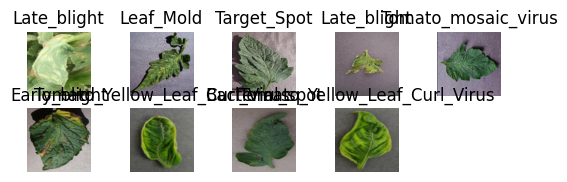

In [ ]:
def format_label(label):
  return ds_info['class_names'][label]

label_info = ds_info['class_names']
for i, (image, label) in enumerate(train_dataset.take(9)):
  ax = plt.subplot(5, 5, i + 1)
  plt.imshow(image.numpy().astype("uint8"))
  plt.title('{}'.format(format_label(label)))
  plt.axis('off')

In [ ]:
from keras import layers


data_augmentation = tf.keras.Sequential([
    layers.RandomRotation(0.2),
    layers.RandomTranslation(0.2, 0.2),
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomContrast(0.2),
    layers.RandomZoom(0.2),
    layers.RandomBrightness(0.2),
    layers.RandomCrop(224, 224),
    layers.GaussianNoise(0.1)
])

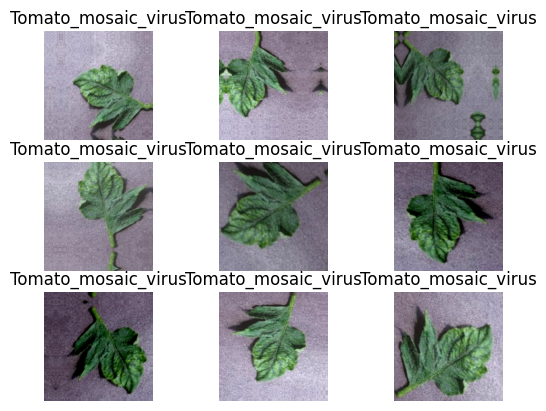

In [ ]:
for image, label in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        aug_img = data_augmentation(np.expand_dims(image.numpy(), axis=0))
        aug_img = np.array(aug_img)
        plt.imshow(aug_img[0].astype("uint8"))
        plt.title("{}".format(format_label(label)))
        plt.axis("off")

In [ ]:
def preprocess_train(image, label):
    image = tf.expand_dims(image, axis=0)
    image = data_augmentation(image)
    image = tf.squeeze(image, axis=0)
    return image, label

def preprocess_validation(image, label):
    # En el conjunto de validación solo se normalizan las imágenes (si es necesario)
    return image, label

# Aplicar preprocesamiento a los conjuntos de datos
train_dataset = train_dataset.map(preprocess_train, num_parallel_calls=tf.data.AUTOTUNE)
validation_dataset = validation_dataset.map(preprocess_validation, num_parallel_calls=tf.data.AUTOTUNE)

train_dataset = train_dataset.batch(100).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_dataset = validation_dataset.batch(100).prefetch(buffer_size=tf.data.AUTOTUNE)


In [ ]:
for images, labels in train_dataset.take(1):  # Tomar solo un lote de datos
    print("Image batch shape:", images.shape)
    print("Label batch shape:", labels.shape)

Image batch shape: (100, 224, 224, 3)
Label batch shape: (100,)


In [ ]:
from keras.applications import ResNet50
from keras.layers import Dense, Flatten, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam
from keras import layers, models, regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau

# Definir el modelo ResNet50 con regularización
def create_resnet50_model(input_shape=(224, 224, 3), num_classes=ds_info['num_classes']):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    predictions = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs=base_model.input, outputs=predictions)

    for layer in base_model.layers:
        layer.trainable = False

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Crear el modelo
model = create_resnet50_model()

# Definir los callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/Tomates_proyecto/best_model.weights.h5', monitor='val_loss', save_best_only=True, save_weights_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-7)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# Entrenar el modelo
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=60,
    callbacks=[early_stopping, checkpoint, reduce_lr]
)

# Cargar los mejores pesos y evaluar
model.load_weights('/content/drive/MyDrive/Tomates_proyecto/best_model.weights.h5')
loss, accuracy = model.evaluate(validation_dataset)
print(f'Best Validation accuracy: {accuracy * 100:.2f}%')

Epoch 1/60
192/192 ━━━━━━━━━━━━━━━━━━━━ 471s 2s/step - accuracy: 0.2807 - loss: 15.9625 - val_accuracy: 0.6317 - val_loss: 13.2047 - learning_rate: 1.0000e-04
Epoch 2/60
192/192 ━━━━━━━━━━━━━━━━━━━━ 450s 2s/step - accuracy: 0.5434 - loss: 13.2859 - val_accuracy: 0.7116 - val_loss: 11.4619 - learning_rate: 1.0000e-04
Epoch 3/60
192/192 ━━━━━━━━━━━━━━━━━━━━ 437s 2s/step - accuracy: 0.6063 - loss: 11.5795 - val_accuracy: 0.7285 - val_loss: 10.0730 - learning_rate: 1.0000e-04
Epoch 4/60
192/192 ━━━━━━━━━━━━━━━━━━━━ 411s 2s/step - accuracy: 0.6404 - loss: 10.1144 - val_accuracy: 0.7498 - val_loss: 8.7879 - learning_rate: 1.0000e-04
Epoch 5/60
192/192 ━━━━━━━━━━━━━━━━━━━━ 437s 2s/step - accuracy: 0.6551 - loss: 8.8693 - val_accuracy: 0.7590 - val_loss: 7.7135 - learning_rate: 1.0000e-04
Epoch 6/60
192/192 ━━━━━━━━━━━━━━━━━━━━ 407s 2s/step - accuracy: 0.6721 - loss: 7.7831 - val_accuracy: 0.7754 - val_loss: 6.7577 - learning_rate: 1.0000e-04
Epoch 7/60
192/192 ━━━━━━━━━━━━━━━━━━━━ 407s 2s/ste

In [ ]:
# Guardar los pesos del modelo
model.save_weights('/content/drive/MyDrive/Tomates_proyecto/resnet50_weights.weights.h5')
print("Model weights saved successfully in Google Drive.")


In [ ]:
# Gráficas de precisión y pérdida
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
# Guardar el modelo completo en un archivo .h5
model.save('/content/drive/MyDrive/Tomates_proyecto/resnet50_model.h5')

print("Model saved successfully in Google Drive.")


FINE-TUNING CON NUEVO DATASET


In [ ]:
new_data_dir = "/content/drive/MyDrive/Tomates_proyecto/Con_Fondo_2"

In [ ]:
from PIL import Image
import os

def resize_images_in_directory(input_dir, output_dir, target_size=(224, 224)):
    # Recorre todos los archivos y subdirectorios dentro del directorio de entrada
    for root, dirs, files in os.walk(input_dir):
        # Crea la estructura de directorios en el directorio de salida
        for dir_name in dirs:
            os.makedirs(os.path.join(output_dir, os.path.relpath(root, input_dir), dir_name), exist_ok=True)

        # Procesa cada archivo en el directorio actual
        for file in files:
            # Verifica si es un archivo de imagen
            if file.endswith(('.jpg', '.jpeg', '.png', '.bmp')):
                # Define los directorios de entrada y salida para la imagen actual
                input_path = os.path.join(root, file)
                relative_output_dir = os.path.relpath(root, input_dir)
                output_subdir = os.path.join(output_dir, relative_output_dir)
                output_path = os.path.join(output_subdir, file)

                # Crea el directorio de salida si no existe
                os.makedirs(output_subdir, exist_ok=True)

                # Abre la imagen y la redimensiona
                with Image.open(input_path) as img:
                    resized_img = img.resize(target_size)
                    resized_img.save(output_path)

                print(f"Imagen redimensionada: {input_path} -> {output_path}")

# Directorio de entrada con las imágenes originales
input_dir = '/content/drive/MyDrive/Tomates_proyecto/Con_Fondo_2'

# Directorio de salida donde se guardarán las imágenes redimensionadas
output_dir = '/content/drive/MyDrive/Tomates_proyecto/Con_Fondo_2-redimensionadas'

# Tamaño objetivo para las imágenes redimensionadas
target_size = (224, 224)

# Redimensiona las imágenes
resize_images_in_directory(input_dir, output_dir, target_size)

Imagen redimensionada: /content/drive/MyDrive/Tomates_proyecto/Con_Fondo_2/Target_Spot/Tablao_Compostura_063.jpg -> /content/drive/MyDrive/Tomates_proyecto/Con_Fondo_2-redimensionadas/Target_Spot/Tablao_Compostura_063.jpg
Imagen redimensionada: /content/drive/MyDrive/Tomates_proyecto/Con_Fondo_2/Target_Spot/Tablao_Compostura_025.jpg -> /content/drive/MyDrive/Tomates_proyecto/Con_Fondo_2-redimensionadas/Target_Spot/Tablao_Compostura_025.jpg
Imagen redimensionada: /content/drive/MyDrive/Tomates_proyecto/Con_Fondo_2/Early_blight/0efaac13-1988-48db-aec3-f31df3045b95___RS_Erly.B 8342.png -> /content/drive/MyDrive/Tomates_proyecto/Con_Fondo_2-redimensionadas/Early_blight/0efaac13-1988-48db-aec3-f31df3045b95___RS_Erly.B 8342.png
Imagen redimensionada: /content/drive/MyDrive/Tomates_proyecto/Con_Fondo_2/Early_blight/93dd10f7-791e-4c52-a8d0-f9196cafaecb___RS_Erly.B 8284.png -> /content/drive/MyDrive/Tomates_proyecto/Con_Fondo_2-redimensionadas/Early_blight/93dd10f7-791e-4c52-a8d0-f9196cafaecb__

In [140]:
import tensorflow as tf
from keras import layers, models, regularizers
from keras.applications import ResNet50
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt

def database(data_dir, validation_split=0.2, seed=1534, batch_size=None):
    train_dataset = tf.keras.utils.image_dataset_from_directory(
        data_dir,
        validation_split=validation_split,
        subset='training',
        seed=seed,
        batch_size=batch_size,
        label_mode='int',
        image_size=(224, 224)
    )

    validation_dataset = tf.keras.utils.image_dataset_from_directory(
        data_dir,
        validation_split=validation_split,
        subset='validation',
        seed=seed,
        batch_size=batch_size,
        label_mode='int',
        image_size=(224, 224)
    )

    class_names = train_dataset.class_names
    num_classes = len(class_names)

    ds_info = {
        'num_classes': num_classes,
        'class_names': class_names
    }

    return train_dataset, validation_dataset, ds_info

In [141]:


# Definir la capa de data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomRotation(0.2),
    layers.RandomTranslation(0.2, 0.2),
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomContrast(0.2),
    layers.RandomZoom(0.2),
    layers.RandomBrightness(0.2),
    layers.RandomCrop(224, 224),
    layers.GaussianNoise(0.1)
])

In [233]:
# Compilar el modelo
new_data_dir = "/content/drive/MyDrive/Tomates_proyecto/Con_Fondo_2"

new_train_dataset, new_validation_dataset, new_ds_info = database(new_data_dir)
print("Number of classes in the new dataset:", new_ds_info['num_classes'])

Found 35 files belonging to 11 classes.
Using 28 files for training.
Found 35 files belonging to 11 classes.
Using 7 files for validation.
Number of classes in the new dataset: 11


In [234]:
def preprocess_train(image, label):
    # Convertir las etiquetas a one-hot encoding
    label = tf.one_hot(label, new_ds_info['num_classes'])
    image = tf.expand_dims(image, axis=0)
    image = data_augmentation(image)
    image = tf.squeeze(image, axis=0)
    return image, label

def preprocess_validation(image, label):
    # Convertir las etiquetas a one-hot encoding
    label = tf.one_hot(label, new_ds_info['num_classes'])
    return image, label

In [235]:
from keras.applications import ResNet50
from keras.layers import Dense, Flatten, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam
from keras import layers, models, regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Modificar el modelo para fine-tuning
def create_resnet50_model(input_shape=(224, 224, 3), num_classes=new_ds_info['num_classes']):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    predictions = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs=base_model.input, outputs=predictions)

    # Descongelar las últimas capas del modelo base
    for layer in base_model.layers:
        layer.trainable = False

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [236]:
# Crear el modelo para fine-tuning
model = create_resnet50_model()
model.load_weights('/content/drive/MyDrive/Tomates_proyecto/best_model.weights.h5')

In [237]:
# Ajustar el modelo para el nuevo dataset
def update_model_for_new_dataset(model, num_new_classes):
    model.layers[-1] = layers.Dense(num_new_classes, activation='softmax')
    return model

model = update_model_for_new_dataset(model, new_ds_info['num_classes'])

In [238]:
# Hacer entrenables algunas capas del modelo base
for layer in model.layers[:500]:  # Ajustar el número según las capas que desees entrenar
    layer.trainable = False
for layer in model.layers[500:]:
    layer.trainable = True


In [239]:
# Compilar el modelo con una tasa de aprendizaje baja para fine-tuning
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [240]:
# Aplicar preprocesamiento al nuevo dataset
new_train_dataset = new_train_dataset.map(preprocess_train, num_parallel_calls=tf.data.AUTOTUNE)
new_validation_dataset = new_validation_dataset.map(preprocess_validation, num_parallel_calls=tf.data.AUTOTUNE)

new_train_dataset = new_train_dataset.batch(200).prefetch(buffer_size=tf.data.AUTOTUNE)
new_validation_dataset = new_validation_dataset.batch(200).prefetch(buffer_size=tf.data.AUTOTUNE)


In [241]:
# Definir los callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/Tomates_proyecto/new_best_model.weights.h5', monitor='val_loss', save_best_only=True, save_weights_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-7)

In [242]:
# Entrenar el modelo con el nuevo dataset
new_history = model.fit(
    new_train_dataset,
    validation_data=new_validation_dataset,
    epochs=100,
    callbacks=[early_stopping, checkpoint, reduce_lr]
)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.2143 - loss: 3.6115 - val_accuracy: 0.1429 - val_loss: 5.1504 - learning_rate: 1.0000e-05
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.2500 - loss: 3.3061 - val_accuracy: 0.1429 - val_loss: 5.1504 - learning_rate: 1.0000e-05
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step - accuracy: 0.2143 - loss: 3.9211 - val_accuracy: 0.1429 - val_loss: 5.1504 - learning_rate: 1.0000e-05
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 843ms/step - accuracy: 0.2143 - loss: 3.7388 - val_accuracy: 0.1429 - val_loss: 5.1504 - learning_rate: 1.0000e-05
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step - accuracy: 0.1071 - loss: 3.9734 - val_accuracy: 0.1429 - val_loss: 5.1504 - learning_rate: 1.0000e-06
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step - accuracy: 0.2857 - loss: 3.2186 - val_accuracy: 0.1429 - val_loss: 5.1504 - learning_rate: 1.0000e-06
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step - accuracy: 0.1786 - lo

In [243]:
# Cargar los mejores pesos y evaluar
model.load_weights('/content/drive/MyDrive/Tomates_proyecto/new_best_model.weights.h5')
loss, accuracy = model.evaluate(new_validation_dataset)
print(f'Best Validation accuracy: {accuracy * 100:.2f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.1429 - loss: 5.1504
Best Validation accuracy: 14.29%


In [244]:
# Guardar los pesos del modelo
model.save_weights('/content/drive/MyDrive/Tomates_proyecto/new_resnet50_weights.weights.h5')
print("Model weights saved successfully in Google Drive.")

# Guardar el modelo completo en un archivo .h5
model.save('/content/drive/MyDrive/Tomates_proyecto/new_resnet50_model.h5')
print("Model saved successfully in Google Drive.")


Model weights saved successfully in Google Drive.
Model saved successfully in Google Drive.


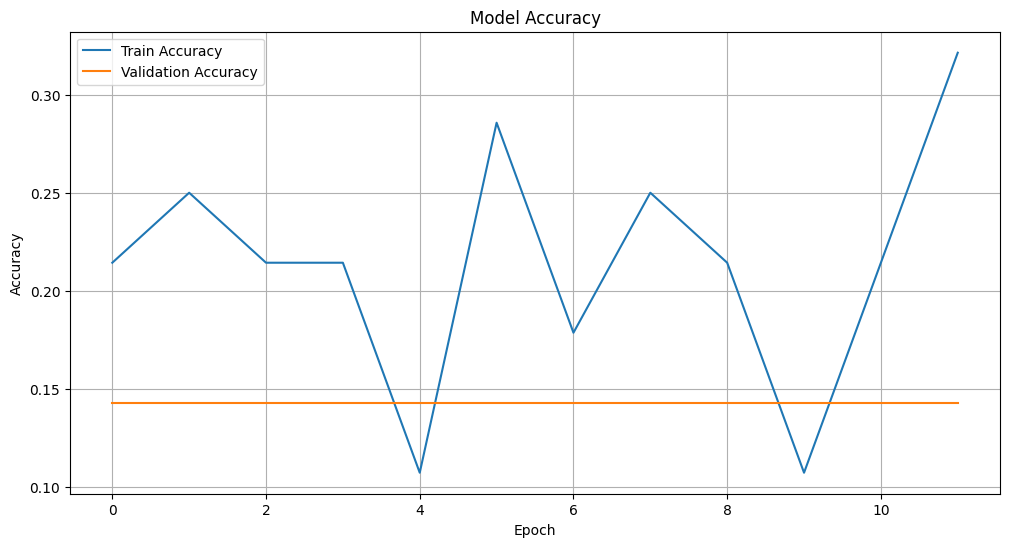

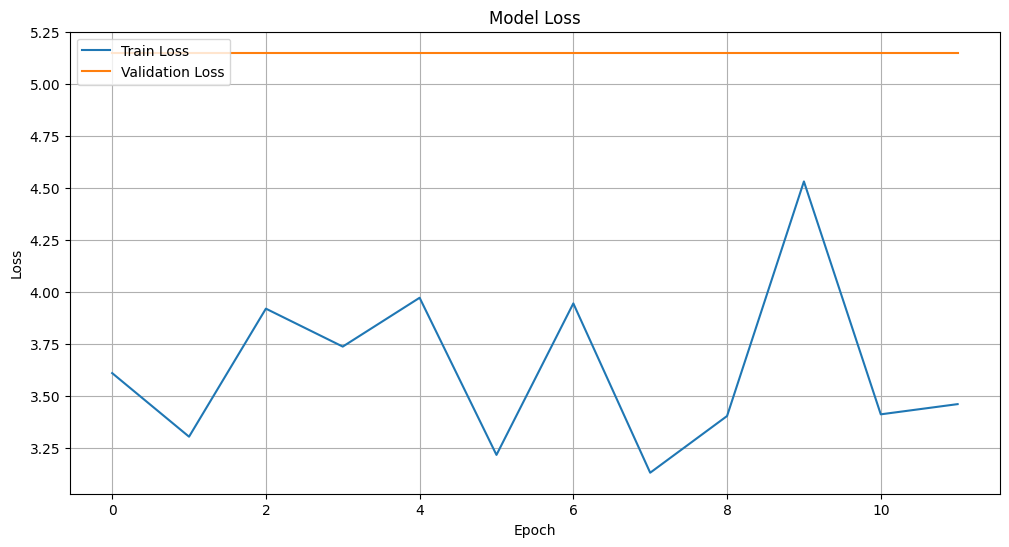

In [245]:
plt.figure(figsize=(12, 6))
plt.plot(new_history.history['accuracy'], label='Train Accuracy')
plt.plot(new_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(new_history.history['loss'], label='Train Loss')
plt.plot(new_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()